# DSCI 303 - Homework 08
### Chris Moore

In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



#### Problem 1: NYC Restaurants Dataset
>In Problem 1, you will be working with the NYC Restaurants Dataset. This dataset contains information about 168 Italian restaurants in New York City. You can find more information about this dataset here: Italian Restaurants Dataset


In [43]:
nyc= pd.read_csv('nyc.txt',delimiter = '\t')
nyc.head(10)

,Price,Food,Decor,Service,Wait,East
0,43,22,18,20,36,0
1,32,20,19,19,22,0
2,34,21,13,18,20,0
3,41,20,20,17,25,0
4,54,24,19,21,32,0
5,52,22,22,21,15,0
6,34,22,16,21,25,0
7,34,20,18,21,21,1
8,39,22,19,22,23,1
9,44,21,17,19,27,1


In [103]:
#Our goal in this problem will be to create a linear regression model to 
#predict the value of Price using the other five columns as features.

x1 = nyc.iloc[ : , 1:6 ].values
y1= nyc['Price'].values




X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x1, y1, test_size = 0.20, random_state = 1)

print (f'Training Features Shape: {X_train_1.shape}\n'
       f'Test Features Shape:     {X_test_1.shape}')



Training Features Shape: (134, 5)
Test Features Shape:     (34, 5)


In [104]:
nyc_mod=LinearRegression().fit(X_train_1, y_train_1)
print(f'Intercept:      {nyc_mod.intercept_}\n'
     f'Coefficients:  {nyc_mod.coef_}')

Intercept:      -23.75543532248895
Coefficients:  [ 1.56  2.01 -0.25  0.09  2.63]


In [105]:
print(f'Training r-Squared: {round(nyc_mod.score(X_train_1, y_train_1),4)}\n'
      f'Testing r-Squared:  {round(nyc_mod.score(X_test_1, y_test_1),4)}')

Training r-Squared: 0.6306
Testing r-Squared:  0.6245


In [106]:
test_pred_1= nyc_mod.predict(X_test_1)
y_test1 =np.array(y_test_1.reshape(1 ,len(y_test_1)))

test_pred_1=np.array(test_pred_1.reshape(1 ,len(test_pred_1)))

np.set_printoptions(precision=2)

print(f'Observed Prices:   {y_test_1[:10]} \n'
      f'Estimated Prices:  {np.rint(test_pred_1[:10])} ') 


Observed Prices:   [33 45 54 38 22 47 38 51 46 47] 
Estimated Prices:  [[39. 38. 49. 39. 20. 47. 37. 50. 48. 43. 34. 52. 40. 33. 49. 36. 47. 37.
  40. 41. 30. 37. 43. 48. 47. 36. 46. 51. 45. 56. 45. 36. 50. 44.]] 


In [175]:
nyc_new = {'Food' : [22,18,25] , 'Decor' : [12 , 19 , 22] , 'Service' : [20 ,22, 18] ,
'Wait' : [15, 34 ,36 ] , 'East' : [ 0,1 ,0 ] } 

nyc_new=(pd.DataFrame(nyc_new))


new_pred_1= nyc_mod.predict(nyc_new)


print( f'Estimated Prices: {np.round(new_pred_1,decimals=2)}')

Estimated Prices: [30.87 42.57 58.06]


#### Problem 2: Diamonds Dataset
>In Problem 2, you will be working with the Diamonds Dataset. This dataset contains information about several thousand diamonds sold in the United States. You can find more information about this dataset, including a description of its columns, here: Diamonds Dataset.

In [2]:
diamonds= pd.read_csv('diamonds.txt', delimiter = '\t')
diamonds.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [3]:
diamonds['ln_carat'] = np.log(diamonds.iloc[:, 0])
diamonds['ln_price'] = np.log(diamonds.iloc[:, 7])
diamonds.head(5)

/Users/christophermoore/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,1.373716
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,1.358409
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,1.398717
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,1.435085
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,1.467874


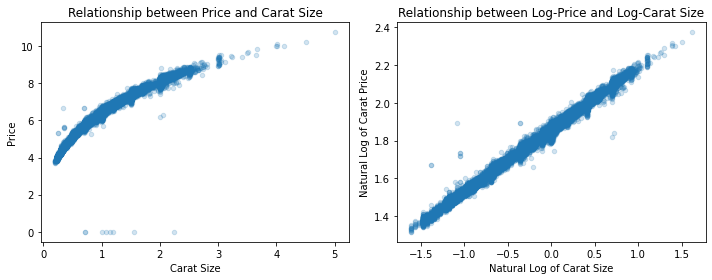

In [4]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(10,4))
ax1.scatter(diamonds.iloc[:, 0], diamonds.iloc[:, 7],s=20,alpha=0.2)
ax1.set_title('Relationship between Price and Carat Size')
ax1.set_xlabel('Carat Size')
ax1.set_ylabel('Price')

ax2.scatter(diamonds['ln_carat'], diamonds['ln_price'],s=20,alpha=0.2)
ax2.set_title('Relationship between Log-Price and Log-Carat Size')
ax2.set_xlabel('Natural Log of Carat Size') 
ax2.set_ylabel('Natural Log of Carat Price')
plt.tight_layout() 
plt.show()

In [55]:
#Our goal in this problem will be to create a linear regression model 
#to estimate the price of a diamond based only on its carat size. 


#X2 = diamonds.iloc[ : , 10:11 ].values 
#y2 = diamonds['price']].values 

X2 = np.log(diamonds['carat'].to_numpy().reshape(diamonds.shape[0],1)) # converting carat to ln_carat and numpy  2d array
y2 = np.log(diamonds['price'].to_numpy()) # converting price to ln_price and numpy 1d array

print(X2.shape,y2.shape)

#I tried to use iloc to set x2 and y2 ,but I got results that seemed really far off.
#I had to consult stackoverflow for help.  

(53940, 1) (53940,)


In [56]:
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X2, y2, test_size=0.1, random_state=1)


print(f"Training Features Shape: {X_train_2.shape}\n"
      f"Test Features Shape:     {X_test_2.shape}")

Training Features Shape: (48546, 1)
Test Features Shape:     (5394, 1)


In [57]:
dia_mod=LinearRegression().fit(X_train_2, y_train_2)
print(f'Intercept:      {dia_mod.intercept_}\n'
     f'Coefficients:  {dia_mod.coef_}')

Intercept:      8.448298621179152
Coefficients:  [1.67]


In [58]:
print(f'Training r-Squared: {round(dia_mod.score(X_train_2, y_train_2),4)}\n'
      f'Testing r-Squared:  {round(dia_mod.score(X_test_2, y_test_2),4)}')

Training r-Squared: 0.933
Testing r-Squared:  0.9328


In [59]:


test_pred_2 = dia_mod.predict(X_test_2)
print(f"Observed Prices:  {y_test_2}\n"
      f"Estimated Prices: {np.rint(test_pred_2)}")
diamonds.head(5)

Observed Prices:  [6.34 8.69 7.85 ... 8.63 6.89 8.28]
Estimated Prices: [7. 9. 8. ... 8. 7. 8.]


,carat,cut,color,clarity,depth,table,price,x,y,z,ln_carat,ln_price
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.469676,1.373716
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.560648,1.358409
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.469676,1.398717
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.237874,1.435085
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.171183,1.467874


In [62]:
diamonds_new = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0] 
diamonds_new = np.array(diamonds_new).reshape(len(diamonds_new),1)

new_pred_2 = dia_mod.predict(diamonds_new)
new_pred_3 = np.exp(new_pred_2) 

print(f"Estimated Prices: {np.rint(new_pred_3)}")


Estimated Prices: [ 10783.  24915.  57566. 133007. 307314. 710051.]


#### Problem 3: Heart Disease Dataset
>In Problem 3, you will be working with the Statlog Heart Disease Dataset. This dataset contains medical information about 270 individuals, including a column that indicates whether or not the individual has heart disease. You can find more about this dataset, including descriptions of its columns, here: Statlog Heart Dataset.

In [66]:
hd= pd.read_csv('heart_disease.txt', delimiter = '\t')
hd.head(10)

,age,sex,chest_pain_type,resting_bp,serum_chol,fasting_blood_sugar,electrocardio,max_heart_rate,exercise_induced_angina,oldpeak,slope,major_vessels,thal,heart_disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,1
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,2
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,2
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,2
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,2


In [ ]:
#Our goal in this problem will be to create a logistic regression model
#to predict the label heart_disease using the other columns as features. 


In [81]:
X3=hd.iloc[ : , :-1 ].values  #predictors
y3=hd['heart_disease'.values  #Label

X_train_3,X_test_3,y_train_3,y_test_3 = train_test_split(X3,y3,test_size = 0.2,random_state = 1,stratify = y3)
      
print (f'Training Features Shape: {X_train_3.shape}\n'
       f'Test Features Shape:     {X_test_3.shape}')



Training Features Shape: (216, 13)
Test Features Shape:     (54, 13)
(270, 13)


Createalogistic regressionmodelnamedhd_modwithsolver='lbfgs'andpenalty='none'.Thenfitthemodel to the training data. If you get a warning message stating that the model failed to converge, then increase the max_iter parameter until it does converge.

In [138]:
hd_mod= LogisticRegression(solver='lbfgs', penalty='none',max_iter=1000)
_ = hd_mod.fit(X_train_3, y_train_3)

In [139]:
print(f'Intercept:    {hd_mod.intercept_}\n'
      f'Coefficients:\n'
      f'{hd_mod.coef_}')

Intercept:    [-9.83]
Coefficients:
[[-0.03  1.8   0.75  0.03  0.01 -0.71  0.33 -0.02  0.73  0.37  0.28  1.08
   0.38]]


In [95]:
print(f'Training Accuracy:   {round(hd_mod.score(X_train_3,y_train_3),4)}\n'
      f'Testing Accuracy:    {round(hd_mod.score(X_test_3,y_test_3),4)}')

Training Accuracy:   0.8472
Testing Accuracy:    0.8148


In [99]:
test_pred_3 = hd_mod.predict(X_test_3[:20])
print(f'Observed Labels:\n{y_test_3}\n'
      f'Predict Labels:\n{test_pred_3}')

Observed Labels:
[2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1 2 2 1 1 1 2 2 1 2 1 2 2 1 2 2 1 1
 1 1 2 2 1 1 2 2 2 1 2 1 2 1 1 1 1]
Predict Labels:
[2 2 2 1 1 2 1 1 2 1 2 1 1 1 2 1 1 1 2 1]


In [110]:
(pd.DataFrame(hd_mod.predict_proba(X_test_3),columns = ['1','2'])).head(10)

,1,2
0,0.011766,0.988234
1,0.043240,0.956760
2,0.040409,0.959591
3,0.847858,0.152142
4,0.873737,0.126263
5,0.051925,0.948075
6,0.920485,0.079515
7,0.945005,0.054995
8,0.010020,0.989980
9,0.996700,0.003300


#### Problem 4: Gapminder Dataset
>In Problem 4, you will be working with the Gapminder Dataset. This dataset contains socioeconomic information for 184 countries for each year since 1800. You can find more information about this dataset in several places throughout the course, including in Lesson 18.

In [102]:
gm= pd.read_csv('gapminder_data.txt', delimiter = '\t')
gm18=gm[gm['year'] == 2018]
gm18.head(10)


,country,year,continent,population,life_exp,gdp_per_cap,gini
40112,Afghanistan,2018,asia,36400000,58.7,1870,36.8
40113,Albania,2018,europe,2930000,78.0,12400,29.0
40114,Algeria,2018,africa,42000000,77.9,13700,27.6
40115,Angola,2018,africa,30800000,65.2,5850,42.6
40116,Antigua and Barbuda,2018,americas,103000,77.6,21000,40.0
40117,Argentina,2018,americas,44700000,77.0,18900,42.4
40118,Armenia,2018,europe,2930000,76.0,8660,32.6
40119,Australia,2018,asia,24800000,82.9,45800,32.3
40120,Austria,2018,europe,8750000,81.8,44600,30.5
40121,Azerbaijan,2018,europe,9920000,72.3,16600,32.4


In [133]:
#Our goal in this problem will be to create a logistic regression model to predict the label continent 
#using the columns life_exp, gdp_per_cap, and gini as features.
#Note that only these three columns should be used as features.


X4=gm18.iloc[ : , 4:7 ].values  #predictors
y4=gm18['continent'].values  #Label

X_train_4,X_test_4,y_train_4,y_test_4 = train_test_split(X4,y4,test_size = 0.3,random_state = 1,stratify = y4)

print (f'Training Features Shape: {X_train_4.shape}\n'
       f'Test Features Shape:     {X_test_4.shape}')

Training Features Shape: (128, 3)
Test Features Shape:     (56, 3)


In [164]:
gm_mod= LogisticRegression(solver='lbfgs', penalty='none',multi_class='multinomial',max_iter=289)
_ = gm_mod.fit(X_train_4, y_train_4)




In [165]:
print(f'Intercept:    {gm_mod.intercept_}\n'
      f'Coefficients:\n'
      f'{gm_mod.coef_}')

Intercept:    [ 0. -0.  0. -0.]
Coefficients:
[[-8.82e-02 -1.03e-04  2.01e-01]
 [-8.62e-02  3.30e-05  1.60e-01]
 [ 1.93e-02  2.94e-05 -2.32e-02]
 [ 1.55e-01  4.03e-05 -3.37e-01]]


In [166]:
print(f'Training Accuracy:   {round(gm_mod.score(X_train_4,y_train_4),4)}\n'
      f'Testing Accuracy:    {round(gm_mod.score(X_test_4,y_test_4),4)}')

Training Accuracy:   0.625
Testing Accuracy:    0.5893


In [167]:
test_pred_4 = gm_mod.predict(X_test_4)
print(f'Observed Labels:\n{y_test_4[0:9]}\n'
      f'Predict Labels:\n{test_pred_4[0:9]}')

Observed Labels:
['americas' 'asia' 'asia' 'asia' 'africa' 'europe' 'asia' 'europe'
 'europe']
Predict Labels:
['asia' 'europe' 'africa' 'asia' 'europe' 'europe' 'africa' 'europe'
 'europe']


In [150]:
(pd.DataFrame(gm_mod.predict_proba(X_test_4),columns = ['africa', 'americas', 'asia','europe'])).head(10)

#The data seems heavily slanted towards Europe. I'm not sure if I did something wrong that caused this. 

,africa,americas,asia,europe
0,0.066567,0.259353,0.578351,0.095729
1,0.001119,0.043678,0.358265,0.596938
2,0.662409,0.210932,0.123189,0.003470
3,0.227157,0.261868,0.456595,0.054380
4,0.002045,0.004924,0.112431,0.880601
5,0.001862,0.023892,0.252432,0.721814
6,0.629907,0.219046,0.147126,0.003921
7,0.000027,0.000737,0.033172,0.966064
8,0.001249,0.010855,0.163490,0.824406
9,0.178495,0.117956,0.492336,0.211214



According to our model:
* Country 0 is most likely in Europe.
* Country 1 is most likely in Europe.
* Country 2 is most likely in Africa.
* Country 3 is most likely in Europe.
* Country 4 is most likely in Europe.
* Country 5 is most likely in Europe.